In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests
import nltk
from nltk import word_tokenize
from nltk import PorterStemmer, LancasterStemmer, SnowballStemmer, WordNetLemmatizer
from nltk import wordpunct_tokenize, pos_tag, ne_chunk
from nltk.corpus import stopwords
from nltk import everygrams
from nltk import ngrams
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Q1

#### Transforming 20 newsgroup dataset with tf–idf vectorizer and Running MultinomialNB, SVM/svc, and KNN classification algorithms on the dataset.

##### Results:
##### MNB: 0.77
##### SVM: 0.84
##### KNN: 0.66

In [2]:
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)
twenty_test = fetch_20newsgroups(subset='test', shuffle=True)

# tfidf vectorizer
tfidf_Vect = TfidfVectorizer()

# xtrain,xtest split
X_train_tfidf = tfidf_Vect.fit_transform(twenty_train.data)
X_test_tfidf = tfidf_Vect.transform(twenty_test.data)

In [3]:
# Multinomial NB fit
clf = MultinomialNB()
clf.fit(X_train_tfidf, twenty_train.target)

#Printing accuracy on predictions
predicted = clf.predict(X_test_tfidf)
score = metrics.accuracy_score(twenty_test.target, predicted)
print(score)

0.7738980350504514


In [4]:
# SVC fit
classifier = svm.SVC(kernel='linear', gamma='auto',C=2)
classifier.fit(X_train_tfidf,twenty_train.target)

#Printing accuracy on predictions
y_predict = classifier.predict(X_test_tfidf)
print(classification_report(twenty_test.target,y_predict))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80       319
           1       0.69      0.83      0.75       389
           2       0.77      0.70      0.73       394
           3       0.69      0.79      0.74       392
           4       0.82      0.83      0.83       385
           5       0.84      0.73      0.78       395
           6       0.81      0.91      0.86       390
           7       0.87      0.89      0.88       396
           8       0.97      0.93      0.95       398
           9       0.91      0.93      0.92       397
          10       0.97      0.94      0.96       399
          11       0.96      0.89      0.92       396
          12       0.75      0.81      0.78       393
          13       0.86      0.84      0.85       396
          14       0.92      0.89      0.91       394
          15       0.85      0.92      0.88       398
          16       0.75      0.89      0.81       364
          17       0.98    

In [5]:
# KNN fit with k = 3
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_tfidf, twenty_train.target)

#Printing accuracy on predictions
Y_pred = knn.predict(X_test_tfidf)
print(classification_report(twenty_test.target,Y_pred))

              precision    recall  f1-score   support

           0       0.43      0.75      0.54       319
           1       0.45      0.65      0.53       389
           2       0.52      0.56      0.54       394
           3       0.52      0.62      0.57       392
           4       0.55      0.58      0.56       385
           5       0.69      0.59      0.64       395
           6       0.59      0.48      0.53       390
           7       0.75      0.68      0.71       396
           8       0.83      0.80      0.82       398
           9       0.77      0.75      0.76       397
          10       0.88      0.82      0.85       399
          11       0.74      0.83      0.78       396
          12       0.72      0.47      0.57       393
          13       0.78      0.51      0.62       396
          14       0.81      0.77      0.79       394
          15       0.80      0.72      0.76       398
          16       0.72      0.72      0.72       364
          17       0.70    

#### Transforming 20 newsgroup dataset with tf–idf vectorizer with Bigrams and Running MultinomialNB, SVM/svc, and KNN algorithms again.

##### Results:
##### MNB: 0.73
##### SVM: 0.78
##### KNN: 0.59

In [6]:
# tfidf vectorizer with bigrams = 2
tfidf_Vect = TfidfVectorizer(ngram_range=(2,2))

# xtrain,xtest split
X_train_tfidf = tfidf_Vect.fit_transform(twenty_train.data)
X_test_tfidf = tfidf_Vect.transform(twenty_test.data)

In [7]:
# Multinomial NB fit
clf = MultinomialNB()
clf.fit(X_train_tfidf, twenty_train.target)

#Printing accuracy on predictions
predicted = clf.predict(X_test_tfidf)
score = metrics.accuracy_score(twenty_test.target, predicted)
print(score)

0.7327403080191184


In [8]:
# SVC fit
classifier = svm.SVC(kernel='linear', gamma='auto',C=2)
classifier.fit(X_train_tfidf,twenty_train.target)

#Printing accuracy on predictions
y_predict = classifier.predict(X_test_tfidf)
print(classification_report(twenty_test.target,y_predict))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81       319
           1       0.49      0.74      0.59       389
           2       0.74      0.62      0.68       394
           3       0.57      0.72      0.64       392
           4       0.74      0.74      0.74       385
           5       0.72      0.68      0.70       395
           6       0.80      0.88      0.84       390
           7       0.80      0.81      0.80       396
           8       0.92      0.88      0.90       398
           9       0.86      0.88      0.87       397
          10       0.92      0.90      0.91       399
          11       0.94      0.85      0.89       396
          12       0.67      0.70      0.68       393
          13       0.82      0.65      0.73       396
          14       0.88      0.84      0.86       394
          15       0.78      0.92      0.84       398
          16       0.78      0.86      0.81       364
          17       0.97    

In [9]:
# KNN fit with k = 3
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_tfidf, twenty_train.target)

#Printing accuracy on predictions
Y_pred = knn.predict(X_test_tfidf)
print(classification_report(twenty_test.target,Y_pred))

              precision    recall  f1-score   support

           0       0.56      0.78      0.65       319
           1       0.31      0.54      0.39       389
           2       0.34      0.44      0.38       394
           3       0.38      0.49      0.43       392
           4       0.42      0.48      0.45       385
           5       0.54      0.46      0.50       395
           6       0.47      0.45      0.46       390
           7       0.64      0.56      0.60       396
           8       0.76      0.80      0.78       398
           9       0.68      0.61      0.64       397
          10       0.76      0.72      0.74       399
          11       0.77      0.77      0.77       396
          12       0.64      0.48      0.55       393
          13       0.70      0.43      0.53       396
          14       0.75      0.74      0.74       394
          15       0.89      0.66      0.76       398
          16       0.79      0.68      0.73       364
          17       0.81    

#### Transforming 20 newsgroup dataset with tf–idf vectorizer with stop words set to english and Running MultinomialNB, SVM/svc, and KNN algorithms one last time.

##### Results:
##### MNB: 0.82
##### SVM: 0.84
##### KNN: 0.67

In [10]:
# tfidf vectorizer with stop words = english
tfidf_Vect = TfidfVectorizer(stop_words='english')

# xtrain,xtest split
X_train_tfidf = tfidf_Vect.fit_transform(twenty_train.data)
X_test_tfidf = tfidf_Vect.transform(twenty_test.data)

In [11]:
# Multinomial NB fit
clf = MultinomialNB()
clf.fit(X_train_tfidf, twenty_train.target)

#Printing accuracy on predictions
predicted = clf.predict(X_test_tfidf)
score = metrics.accuracy_score(twenty_test.target, predicted)
print(score)

0.8169144981412639


In [12]:
# SVC fit
classifier = svm.SVC(kernel='linear', gamma='auto',C=2)
classifier.fit(X_train_tfidf,twenty_train.target)

#Printing accuracy on predictions
y_predict = classifier.predict(X_test_tfidf)
print(classification_report(twenty_test.target,y_predict))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79       319
           1       0.68      0.81      0.74       389
           2       0.78      0.71      0.75       394
           3       0.69      0.79      0.73       392
           4       0.83      0.83      0.83       385
           5       0.83      0.74      0.78       395
           6       0.78      0.90      0.84       390
           7       0.90      0.89      0.89       396
           8       0.96      0.94      0.95       398
           9       0.90      0.93      0.92       397
          10       0.97      0.95      0.96       399
          11       0.96      0.89      0.92       396
          12       0.73      0.81      0.77       393
          13       0.87      0.84      0.86       396
          14       0.92      0.90      0.91       394
          15       0.86      0.91      0.88       398
          16       0.76      0.89      0.82       364
          17       0.99    

In [13]:
# KNN fit with k = 3
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_tfidf, twenty_train.target)

#Printing accuracy on predictions
Y_pred = knn.predict(X_test_tfidf)
print(classification_report(twenty_test.target,Y_pred))

              precision    recall  f1-score   support

           0       0.58      0.73      0.65       319
           1       0.41      0.66      0.51       389
           2       0.46      0.58      0.52       394
           3       0.47      0.62      0.53       392
           4       0.53      0.59      0.56       385
           5       0.64      0.55      0.59       395
           6       0.52      0.48      0.50       390
           7       0.70      0.67      0.69       396
           8       0.82      0.83      0.83       398
           9       0.76      0.74      0.75       397
          10       0.84      0.84      0.84       399
          11       0.81      0.82      0.81       396
          12       0.71      0.52      0.60       393
          13       0.79      0.56      0.65       396
          14       0.79      0.79      0.79       394
          15       0.85      0.75      0.80       398
          16       0.77      0.70      0.73       364
          17       0.88    

# Q2

In [14]:
#requesting the target website and storing it
html = requests.get('https://www.storynory.com/fox-and-the-crow/')

#calling beautifulsoup html parser for the requested website
bs = BeautifulSoup(html.content, 'html.parser')

In [15]:
#storing all parapgraphs into page which is now a list of 11 paragraphs
page = bs.find_all('p')

In [16]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tigran\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Tigran\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tigran\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Tigran\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Tigran\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Tigran\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already u

True

In [17]:
#creating a small subset of paragraphs to run some of the algorithms on
text = page[6].string + page[7].string

# Tokenizer

In [18]:
#tokenizing each word
w_token = word_tokenize(text)

In [19]:
#w_token = [word for word in w_token if not word in stopwords.words()]

In [20]:
#printing out all tokened words
for i in w_token:
    print(i)

So
I
gazed
up
at
the
tree
with
admiration
and
love
in
my
eyes
and
said
:
“
Ah
,
my
heart
is
smitten
by
this
wonderful
bird
.
If
only
I
could
hear
her
voice
.
I
’
m
sure
that
such
a
charming
creature
must
sing
most
sweetly
!
If
I
could
but
hear
one
line
of
her
song
,
I
would
hail
her
as
the
Princess
of
The
Forest
!
”
Now
I
could
see
my
words
had
hit
home
.
Swelling
with
pride
,
Miss
Crow
puffed
up
her
feathers
and
began
to
sing
the
most
lovely
music
I
have
ever
heard
.


# POS

In [21]:
#pos tagging
tagged = nltk.pos_tag(w_token)

In [22]:
#printing out all tags
tagged

[('So', 'RB'),
 ('I', 'PRP'),
 ('gazed', 'VBD'),
 ('up', 'RB'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('tree', 'NN'),
 ('with', 'IN'),
 ('admiration', 'NN'),
 ('and', 'CC'),
 ('love', 'NN'),
 ('in', 'IN'),
 ('my', 'PRP$'),
 ('eyes', 'NNS'),
 ('and', 'CC'),
 ('said', 'VBD'),
 (':', ':'),
 ('“', 'NN'),
 ('Ah', 'NNP'),
 (',', ','),
 ('my', 'PRP$'),
 ('heart', 'NN'),
 ('is', 'VBZ'),
 ('smitten', 'VBN'),
 ('by', 'IN'),
 ('this', 'DT'),
 ('wonderful', 'JJ'),
 ('bird', 'NN'),
 ('.', '.'),
 ('If', 'IN'),
 ('only', 'RB'),
 ('I', 'PRP'),
 ('could', 'MD'),
 ('hear', 'VB'),
 ('her', 'PRP$'),
 ('voice', 'NN'),
 ('.', '.'),
 ('I', 'PRP'),
 ('’', 'VBP'),
 ('m', 'JJ'),
 ('sure', 'JJ'),
 ('that', 'IN'),
 ('such', 'PDT'),
 ('a', 'DT'),
 ('charming', 'JJ'),
 ('creature', 'NN'),
 ('must', 'MD'),
 ('sing', 'VB'),
 ('most', 'RBS'),
 ('sweetly', 'RB'),
 ('!', '.'),
 ('If', 'IN'),
 ('I', 'PRP'),
 ('could', 'MD'),
 ('but', 'CC'),
 ('hear', 'VB'),
 ('one', 'CD'),
 ('line', 'NN'),
 ('of', 'IN'),
 ('her', 'PRP$'),
 ('s

# Stemming

In [23]:
#choosing a stemmer
lStem = LancasterStemmer()

#looping through tokens and printing out original word and stemmed word
for i in w_token:
    print('Original: {:>10}       Stem: {:>10}'.format(i,lStem.stem(i)))

Original:         So       Stem:         so
Original:          I       Stem:          i
Original:      gazed       Stem:        gaz
Original:         up       Stem:         up
Original:         at       Stem:         at
Original:        the       Stem:        the
Original:       tree       Stem:        tre
Original:       with       Stem:       with
Original: admiration       Stem:      admir
Original:        and       Stem:        and
Original:       love       Stem:        lov
Original:         in       Stem:         in
Original:         my       Stem:         my
Original:       eyes       Stem:         ey
Original:        and       Stem:        and
Original:       said       Stem:       said
Original:          :       Stem:          :
Original:          “       Stem:          “
Original:         Ah       Stem:         ah
Original:          ,       Stem:          ,
Original:         my       Stem:         my
Original:      heart       Stem:      heart
Original:         is       Stem:

# Lemmatization

In [24]:
#choosing lemmatizer
lemmatizer = WordNetLemmatizer()

#looping through tokens and printing out original word and lemmatized word
for i in w_token:
    print('Original: {:>10}       Lem: {:>10}'.format(i,lemmatizer.lemmatize(i)))

Original:         So       Lem:         So
Original:          I       Lem:          I
Original:      gazed       Lem:      gazed
Original:         up       Lem:         up
Original:         at       Lem:         at
Original:        the       Lem:        the
Original:       tree       Lem:       tree
Original:       with       Lem:       with
Original: admiration       Lem: admiration
Original:        and       Lem:        and
Original:       love       Lem:       love
Original:         in       Lem:         in
Original:         my       Lem:         my
Original:       eyes       Lem:        eye
Original:        and       Lem:        and
Original:       said       Lem:       said
Original:          :       Lem:          :
Original:          “       Lem:          “
Original:         Ah       Lem:         Ah
Original:          ,       Lem:          ,
Original:         my       Lem:         my
Original:      heart       Lem:      heart
Original:         is       Lem:         is
Original:  

# NER

In [25]:
print(ne_chunk(pos_tag(wordpunct_tokenize(text))))

(S
  So/RB
  I/PRP
  gazed/VBD
  up/RB
  at/IN
  the/DT
  tree/NN
  with/IN
  admiration/NN
  and/CC
  love/NN
  in/IN
  my/PRP$
  eyes/NNS
  and/CC
  said/VBD
  :/:
  “/NN
  Ah/NNP
  ,/,
  my/PRP$
  heart/NN
  is/VBZ
  smitten/VBN
  by/IN
  this/DT
  wonderful/JJ
  bird/NN
  ./.
  If/IN
  only/RB
  I/PRP
  could/MD
  hear/VB
  her/PRP$
  voice/NN
  ./.
  I/PRP
  ’/VBP
  m/JJ
  sure/JJ
  that/IN
  such/PDT
  a/DT
  charming/JJ
  creature/NN
  must/MD
  sing/VB
  most/RBS
  sweetly/RB
  !/.
  If/IN
  I/PRP
  could/MD
  but/CC
  hear/VB
  one/CD
  line/NN
  of/IN
  her/PRP$
  song/NN
  ,/,
  I/PRP
  would/MD
  hail/VB
  her/PRP
  as/IN
  the/DT
  (ORGANIZATION Princess/NNP)
  of/IN
  The/DT
  (ORGANIZATION Forest/NNP)
  !”/NN
  Now/RB
  I/PRP
  could/MD
  see/VB
  my/PRP$
  words/NNS
  had/VBD
  hit/VBN
  home/NN
  ./.
  Swelling/VBG
  with/IN
  pride/NN
  ,/,
  (PERSON Miss/NNP Crow/NNP)
  puffed/VBD
  up/RP
  her/PRP$
  feathers/NNS
  and/CC
  began/VBD
  to/TO
  sing/VBG
  the/DT
  mo

# Trigram

In [26]:
#setting n-gram value
n = 3
trigram = ngrams(text.split(), n)

#printing all trigrams
for grams in trigram:
  print(grams)

('So', 'I', 'gazed')
('I', 'gazed', 'up')
('gazed', 'up', 'at')
('up', 'at', 'the')
('at', 'the', 'tree')
('the', 'tree', 'with')
('tree', 'with', 'admiration')
('with', 'admiration', 'and')
('admiration', 'and', 'love')
('and', 'love', 'in')
('love', 'in', 'my')
('in', 'my', 'eyes')
('my', 'eyes', 'and')
('eyes', 'and', 'said:')
('and', 'said:', '“Ah,')
('said:', '“Ah,', 'my')
('“Ah,', 'my', 'heart')
('my', 'heart', 'is')
('heart', 'is', 'smitten')
('is', 'smitten', 'by')
('smitten', 'by', 'this')
('by', 'this', 'wonderful')
('this', 'wonderful', 'bird.')
('wonderful', 'bird.', 'If')
('bird.', 'If', 'only')
('If', 'only', 'I')
('only', 'I', 'could')
('I', 'could', 'hear')
('could', 'hear', 'her')
('hear', 'her', 'voice.')
('her', 'voice.', 'I’m')
('voice.', 'I’m', 'sure')
('I’m', 'sure', 'that')
('sure', 'that', 'such')
('that', 'such', 'a')
('such', 'a', 'charming')
('a', 'charming', 'creature')
('charming', 'creature', 'must')
('creature', 'must', 'sing')
('must', 'sing', 'most')
('

In [27]:
#using all paragraphs for word frequencies
all_text = page[0].string + page[1].string + page[2].string + page[3].string + page[4].string + page[5].string + page[6].string + page[7].string + page[8].string + page[9].string + page[10].string

Plot code modified from here
https://www.absentdata.com/python-graphs/python-word-frequency/

In [28]:
def word_frequency(sentence):
    # joins all the sentenses
    sentence =''.join(sentence)
    # creates tokens, creates lower class, removes numbers and lemmatizes the words
    new_tokens = word_tokenize(sentence)
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens =[t for t in new_tokens if t not in stopwords.words()]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
    #counts the words, pairs and trigrams
    counted = Counter(new_tokens)
    #creates 3 data frames and returns thems
    word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
    return word_freq

In [29]:
data = word_frequency(all_text)

In [30]:
#checking until frequency is 1 word
data.head(42)

,word,frequency
47,miss,7
48,crow,7
99,could,5
69,beak,4
40,voice,3
3,eat,3
26,cheese,3
8,say,3
24,even,3
38,bird,3


<AxesSubplot:xlabel='frequency', ylabel='word'>

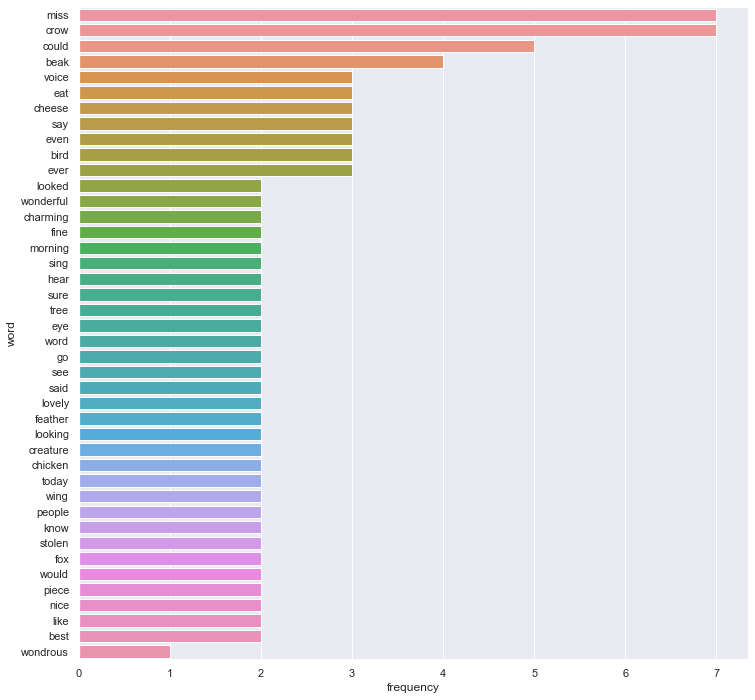

In [31]:
#plot frequencies
sns.set(rc={'figure.figsize':(12,12)})
sns.barplot(x='frequency',y='word',data=data.head(42))